<a href="https://colab.research.google.com/github/LaplasDeamon/python_notebooks/blob/main/%D0%BF%D0%BE%D0%B4%D0%BE%D0%B7%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D1%82%D1%80%D0%B0%D1%84%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler      #Single-layer perceptron
from sklearn.neural_network import MLPClassifier #Multilayer perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
import seaborn as sns

Изучим данные

In [ ]:
df= pd.read_csv('/content/360T.csv', delimiter=',', decimal='.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   num_frames                         2336 non-null   int64  
 1   num_frames_avg                     2336 non-null   int64  
 2   num_packets                        2336 non-null   int64  
 3   num_packets_avg                    2336 non-null   int64  
 4   num_packets_out_avg                2336 non-null   int64  
 5   num_packets_out_max                2336 non-null   int64  
 6   num_packets_out_min                2336 non-null   int64  
 7   num_packets_in_avg                 2336 non-null   int64  
 8   num_packets_in_max                 2336 non-null   int64  
 9   num_packets_in_min                 2336 non-null   int64  
 10  weighted_num_packets_in_avg        2336 non-null   float64
 11  weighted_num_packets_in_max        2336 non-null   float

In [ ]:
df.describe()

,num_frames,num_frames_avg,num_packets,num_packets_avg,num_packets_out_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,num_packets_in_min,...,num_forwarded_packets_avg,num_forwarded_packets_max,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,num_packets_created_min,frac_packets_created_acquired_avg,frac_packets_created_acquired_max,frac_packets_created_acquired_min,class
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,...,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,35357.277397,2259.418664,28316.568065,1809.434932,220.380565,1971.047089,43.384846,218.404966,2024.068921,34.692209,...,612.672945,1591.651969,102.797089,2.305651,233.622003,42.994863,0.819225,1.006849,0.570205,0.963613
std,8029.814256,199.932501,6429.777605,160.455970,16.695954,537.507421,7.394107,16.634178,538.273105,3.465443,...,83.771184,537.416088,30.474561,6.635243,438.116534,7.406980,0.316500,0.092295,0.495153,0.187291
min,30128.000000,2008.000000,24270.000000,1618.000000,200.000000,1535.000000,19.000000,195.000000,1551.000000,17.000000,...,507.000000,1158.000000,0.000000,0.000000,75.000000,19.000000,0.110000,1.000000,0.000000,0.000000
25%,32420.750000,2161.000000,26044.000000,1736.000000,211.000000,1667.000000,43.000000,211.000000,1716.000000,33.000000,...,574.000000,1289.000000,101.000000,1.000000,80.000000,42.000000,0.830000,1.000000,0.000000,1.000000
50%,33002.500000,2200.000000,26395.500000,1759.000000,215.000000,1721.000000,46.000000,213.000000,1780.000000,35.000000,...,586.000000,1342.000000,109.000000,1.000000,83.000000,46.000000,1.000000,1.000000,1.000000,1.000000
75%,34757.250000,2317.000000,27862.000000,1857.000000,222.000000,1848.000000,48.000000,223.000000,1934.500000,37.000000,...,634.000000,1470.000000,117.000000,2.000000,88.000000,47.000000,1.000000,1.000000,1.000000,1.000000
max,76327.000000,3469.000000,64160.000000,2916.000000,270.000000,3495.000000,53.000000,364.000000,4058.000000,44.000000,...,900.000000,3021.000000,148.000000,89.000000,1842.000000,52.000000,1.060000,3.000000,1.000000,1.000000


Предобработка данных не требуется

In [ ]:
y=df['class']
X=df.drop(labels='class', axis=1)

Используем корреляцию для отбора предикторов с корреляцией более не 0.90

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1296x648 with 0 Axes>

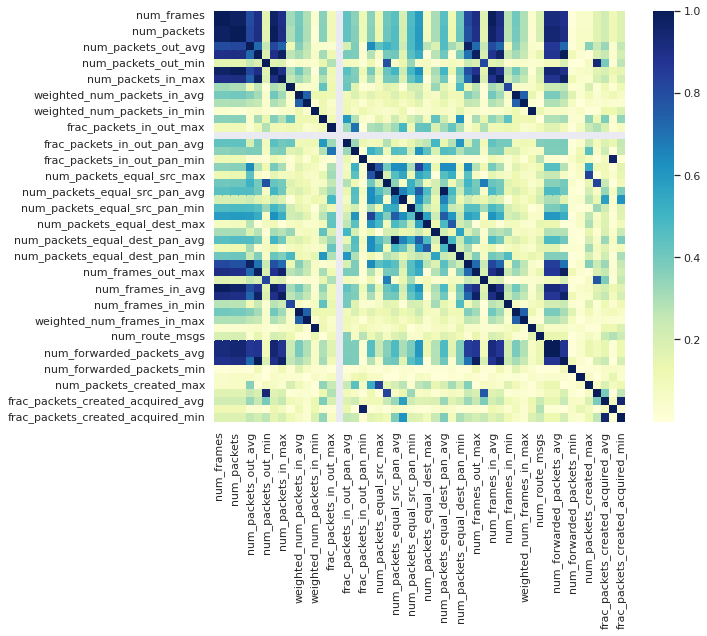

In [ ]:
corr_matrix = X.corr(method = "spearman").abs()

# Draw the heatmap
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
f.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 1080)

# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))



In [ ]:
# Найдем индексы фич с коэф корреляции более 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
importances_corr = X.drop(to_drop, axis = 1)
importances_corr

,num_frames,num_packets_out_avg,num_packets_out_min,num_packets_in_min,weighted_num_packets_in_avg,weighted_num_packets_in_max,weighted_num_packets_in_min,frac_packets_in_out_avg,frac_packets_in_out_max,frac_packets_in_out_min,...,num_packets_equal_dest_min,num_packets_equal_dest_pan_max,num_packets_equal_dest_pan_min,num_frames_out_min,num_frames_in_min,num_route_msgs,num_forwarded_packets_min,num_packets_created_avg,num_packets_created_max,frac_packets_created_acquired_avg
0,38007,218,46,38,124.13,1519.0,303.33,0.31,1,0,...,41,398,344,59,42,4776,108,69,136,1.02
1,32695,212,48,34,111.89,1814.0,257.00,0.32,1,0,...,44,420,339,56,43,0,105,32,83,1.00
2,32655,212,41,30,86.00,1157.0,200.33,0.29,1,0,...,47,414,341,50,31,0,120,21,76,1.00
3,33541,213,50,38,107.57,1427.0,298.00,0.29,1,0,...,40,405,357,59,43,0,112,1,82,1.00
4,32925,213,44,35,89.26,1364.0,194.67,0.32,1,0,...,48,421,351,52,47,0,115,1,83,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,33025,212,45,37,87.60,1025.0,326.00,0.34,1,0,...,39,430,352,52,45,0,126,1,81,1.00
2332,33072,211,39,39,79.92,1077.0,255.00,0.30,1,0,...,47,405,355,45,45,0,106,1,86,1.00
2333,32555,210,48,37,102.88,1716.0,302.50,0.29,1,0,...,42,423,355,59,45,0,117,1,77,1.00
2334,33033,212,47,38,81.45,1254.0,213.33,0.30,1,0,...,41,410,333,59,45,0,92,1,79,1.00


Вычислим уменьшение энтропии в результате преобразования набора данных.

<Figure size 1296x648 with 0 Axes>

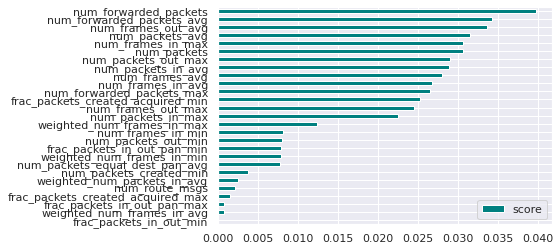

In [ ]:
importances = mutual_info_classif(X, y)
plt.figure(figsize=(18, 9))
feature_importances = pd.DataFrame(data={'score':importances}, 
                      index=X.columns).sort_values(by='score')
feature_importances.plot(kind='barh', color='teal')


In [ ]:
feature_IG=feature_importances.sort_values(by='score',ascending=False).head(int(0.8*len(feature_importances)))


Возьмем пересечение признаков,  которые были отобраны с помощью IG и корреляции

In [ ]:

final_features= list(set(importances_corr.columns) & set(feature_IG.index))
data=df.drop(labels=final_features,axis=1)
y=data['class']
X=data.drop(labels='class', axis=1)
X


,num_frames_avg,num_packets,num_packets_avg,num_packets_out_max,num_packets_out_min,num_packets_in_avg,num_packets_in_max,weighted_num_packets_in_avg,frac_packets_in_out_min,frac_packets_in_out_pan_max,...,weighted_num_frames_in_avg,weighted_num_frames_in_max,weighted_num_frames_in_min,num_route_msgs,num_forwarded_packets,num_forwarded_packets_avg,num_forwarded_packets_max,num_packets_created_min,frac_packets_created_acquired_max,frac_packets_created_acquired_min
0,2533,31348,2089,1777,46,266,2266,124.13,0,1,...,147.60,1808.0,352.33,4776,8740,583,1328,46,2,1
1,2179,26253,1750,1726,48,212,1814,111.89,0,1,...,139.25,2264.0,316.67,0,8627,575,1344,48,1,1
2,2177,26396,1759,1654,41,212,1701,86.00,0,1,...,106.13,1434.0,252.67,0,8668,578,1270,41,1,1
3,2236,26612,1774,1695,50,214,1741,107.57,0,1,...,136.28,1830.0,371.33,0,8787,586,1316,50,1,1
4,2195,26472,1764,1750,44,213,1805,89.26,0,1,...,110.86,1698.0,240.00,0,8783,586,1375,44,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,2201,26446,1763,1654,45,213,1674,87.60,0,1,...,108.41,1245.0,406.00,0,8683,579,1273,45,1,1
2332,2204,26372,1758,1685,39,212,1721,79.92,0,1,...,100.10,1346.0,323.00,0,8601,573,1307,39,1,1
2333,2170,26043,1736,1667,48,210,1716,102.88,0,1,...,128.74,2147.0,380.00,0,8510,567,1289,48,1,1
2334,2202,26395,1759,1714,47,213,1722,81.45,0,1,...,101.68,1575.0,271.67,0,8715,581,1335,46,1,1


In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_val, X_test, y_val, y_test= train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)


In [ ]:
parameters = {}
parameters.update({"AdaBoost": { 
                                "base_estimator": [DecisionTreeClassifier(max_depth = ii) for ii in range(1,6)],
                                "n_estimators":[10,20,30,50],
                                "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0]
                                 }})
parameters.update({"Random Forest": { 
                                    "class_weight": [None, "balanced"],
                                    "n_estimators":[10,20,30,50],
                                    "max_features": ["auto", "sqrt", "log2"],
                                    "max_depth" : [3, 4, 5, 6, 7, 8],
                                    "criterion" :["gini", "entropy"],
                                    "n_jobs": [-1]
                                     }})
parameters.update({"MLP": { 
                            "hidden_layer_sizes": [(20,10),(30,20,10),(100,100),(12,5)],
                            "activation": ["logistic", "relu"],
                            "learning_rate": ["constant", "invscaling", "adaptive"],
                            "alpha": list(10.0 ** -np.arange(1, 5)),
                             }})
classifiers={}
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Random Forest":  RandomForestClassifier()})
classifiers.update({"MLP":  MLPClassifier()})
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

подберем гипер параметры к моделям

In [ ]:

results =[]
for classifier_label, classifier in classifiers.items():
  print(f"Now tuning {classifier_label}.")
  param_grid = parameters[classifier_label]
  gscv = GridSearchCV( classifier, param_grid=param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = "f1").fit(X_train_std, y_train)
  best_params = gscv.best_params_

  best_score = gscv.best_score_
  y_val_pred= gscv.best_estimator_.predict(X_val_std)
  f1_val = f1_score(y_val, y_val_pred)
  result = {
            'Classifier_name':classifier_label,
            "Classifier": gscv.best_estimator_,
            "Val f1":f1_val,
            "Training f1": best_score}    
  results.append( result)

Now tuning AdaBoost.
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Now tuning Random Forest.
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Now tuning MLP.
Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
results

[{'Classifier_name': 'AdaBoost',
  'Classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                     learning_rate=0.001, n_estimators=20),
  'Val f1': 0.9864253393665158,
  'Training f1': 0.9897713441373973},
 {'Classifier_name': 'Random Forest',
  'Classifier': RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                         n_estimators=10, n_jobs=-1),
  'Val f1': 0.9723756906077349,
  'Training f1': 0.9869433130838938},
 {'Classifier_name': 'MLP',
  'Classifier': MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100)),
  'Val f1': 0.9702315325248071,
  'Training f1': 0.9869037245425764}]

In [ ]:
best_estimator=max(results, key=lambda x:x['Val f1'])['Classifier']
y_test_pred=best_estimator.predict(X_test_std)
print('Test AUC: %.4f' % roc_auc_score(y_test,y_test_pred))
print('Test F1 macro: %.4f' % f1_score(y_test,y_test_pred,average='macro'))

Test AUC: 0.8768
Test F1 macro: 0.8664
